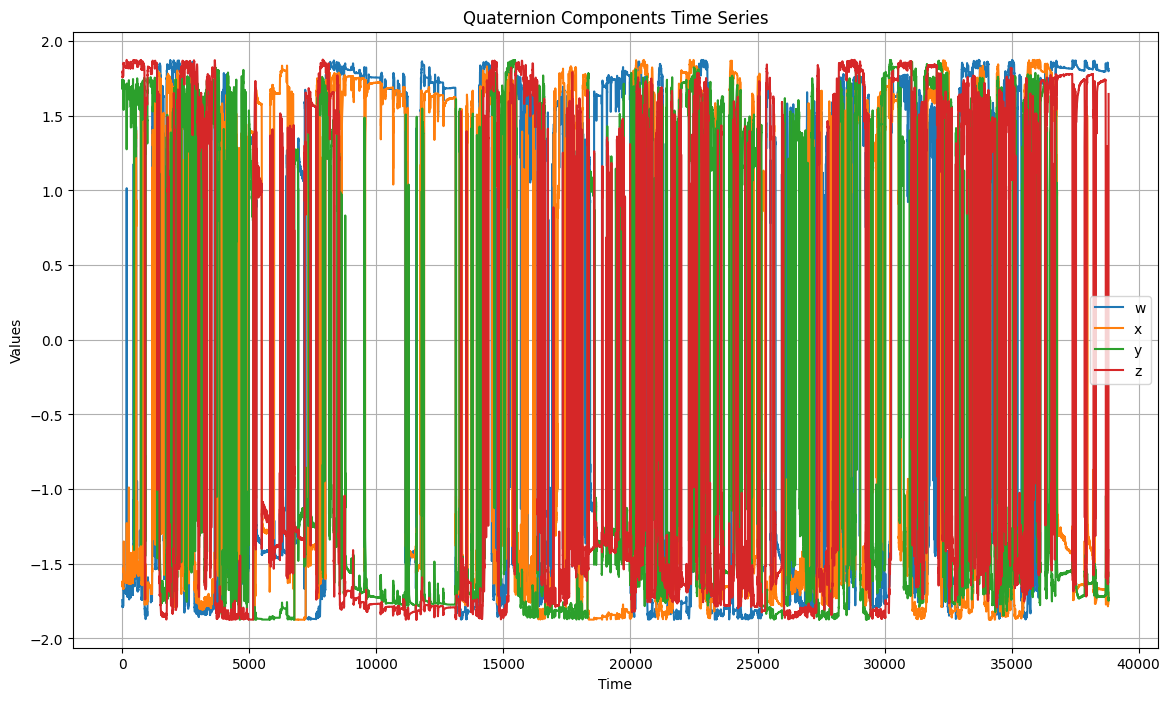

In [3]:
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Path to the file (update this path to your local file path)
file_path = 'H:/Miniscope_data/ACC_pain_kinematics/ID_1027/240524/quaternion_2024-05-24T10_18_28.raw'

# Define the quaternion structure (4 floats: w, x, y, z)
quaternion_size = 4  # number of elements in a quaternion

# Open the file and read the content
with open(file_path, 'rb') as file:
    raw_data = file.read()

# Calculate the number of floats in the raw data
total_floats = len(raw_data) // 4  # 4 bytes per float

# Unpack the binary data into an array of floats
raw_floats = struct.unpack(f'{total_floats}f', raw_data)

# Filter out zero values
filtered_floats = [value for value in raw_floats if value != 0.0]

# Reshape the filtered data into a 2D array where each row represents a quaternion (w, x, y, z)
num_quaternions = len(filtered_floats) // quaternion_size
filtered_floats = filtered_floats[:num_quaternions * quaternion_size]
quaternions = np.array(filtered_floats).reshape((num_quaternions, quaternion_size))

# Convert to DataFrame for better readability
df_quaternions_filtered = pd.DataFrame(quaternions, columns=['w', 'x', 'y', 'z'])

# Plot the entire trace of the quaternion components as a time series
plt.figure(figsize=(14, 8))

# Plot each component across all quaternions
plt.plot(df_quaternions_filtered['w'], label='w')
plt.plot(df_quaternions_filtered['x'], label='x')
plt.plot(df_quaternions_filtered['y'], label='y')
plt.plot(df_quaternions_filtered['z'], label='z')

plt.title('Quaternion Components Time Series')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


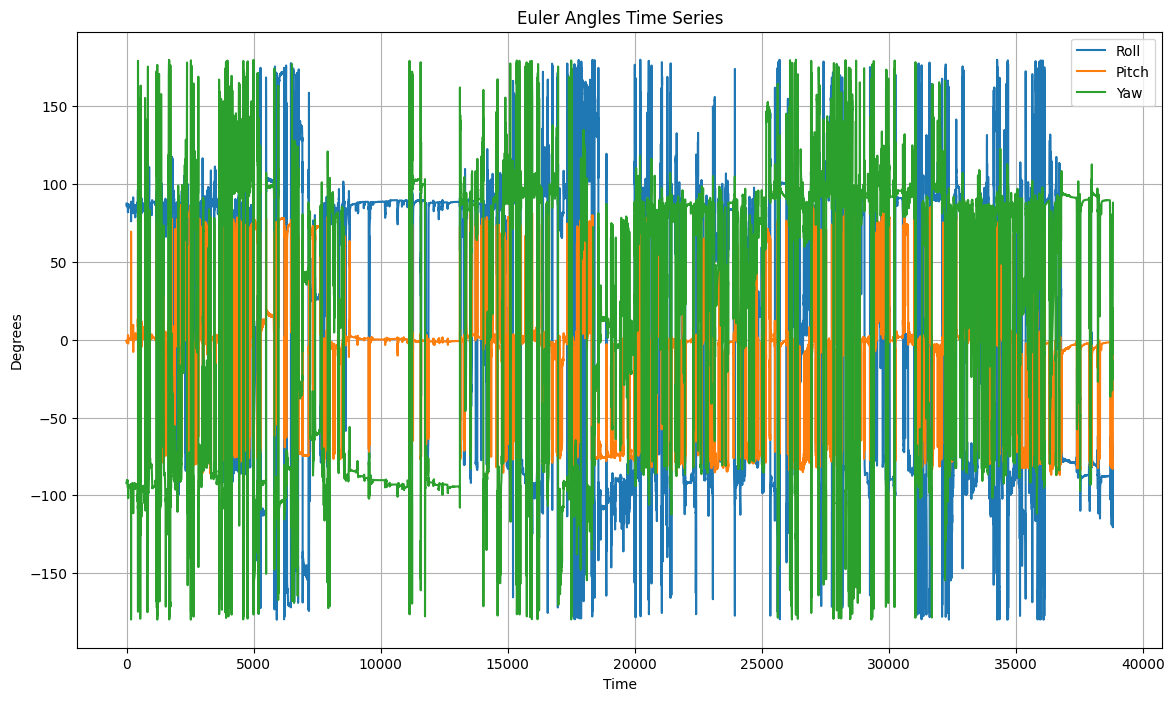

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

# Path to the file (update this path to your local file path)
file_path = 'H:/Miniscope_data/ACC_pain_kinematics/ID_1027/240524/quaternion_2024-05-24T10_18_28.raw'

# Define the quaternion structure (4 floats: w, x, y, z)
quaternion_size = 4  # number of elements in a quaternion

# Open the file and read the content
with open(file_path, 'rb') as file:
    raw_data = file.read()

# Calculate the number of floats in the raw data
total_floats = len(raw_data) // 4  # 4 bytes per float

# Unpack the binary data into an array of floats
raw_floats = struct.unpack(f'{total_floats}f', raw_data)

# Filter out zero values
filtered_floats = [value for value in raw_floats if value != 0.0]

# Reshape the filtered data into a 2D array where each row represents a quaternion (w, x, y, z)
num_quaternions = len(filtered_floats) // quaternion_size
filtered_floats = filtered_floats[:num_quaternions * quaternion_size]
quaternions = np.array(filtered_floats).reshape((num_quaternions, quaternion_size))

# Convert to DataFrame for better readability
df_quaternions_filtered = pd.DataFrame(quaternions, columns=['w', 'x', 'y', 'z'])

# Convert quaternion to Euler angles (roll, pitch, yaw)
r = R.from_quat(df_quaternions_filtered[['x', 'y', 'z', 'w']])
euler_angles = r.as_euler('xyz', degrees=True)  # Use 'xyz' or 'zyx' depending on your convention

# Convert to DataFrame for better readability
df_euler_angles = pd.DataFrame(euler_angles, columns=['roll', 'pitch', 'yaw'])

# Plot Euler angles as time series
plt.figure(figsize=(14, 8))
plt.plot(df_euler_angles['roll'], label='Roll')
plt.plot(df_euler_angles['pitch'], label='Pitch')
plt.plot(df_euler_angles['yaw'], label='Yaw')
plt.title('Euler Angles Time Series')
plt.xlabel('Time')
plt.ylabel('Degrees')
plt.legend()
plt.grid(True)
plt.show()


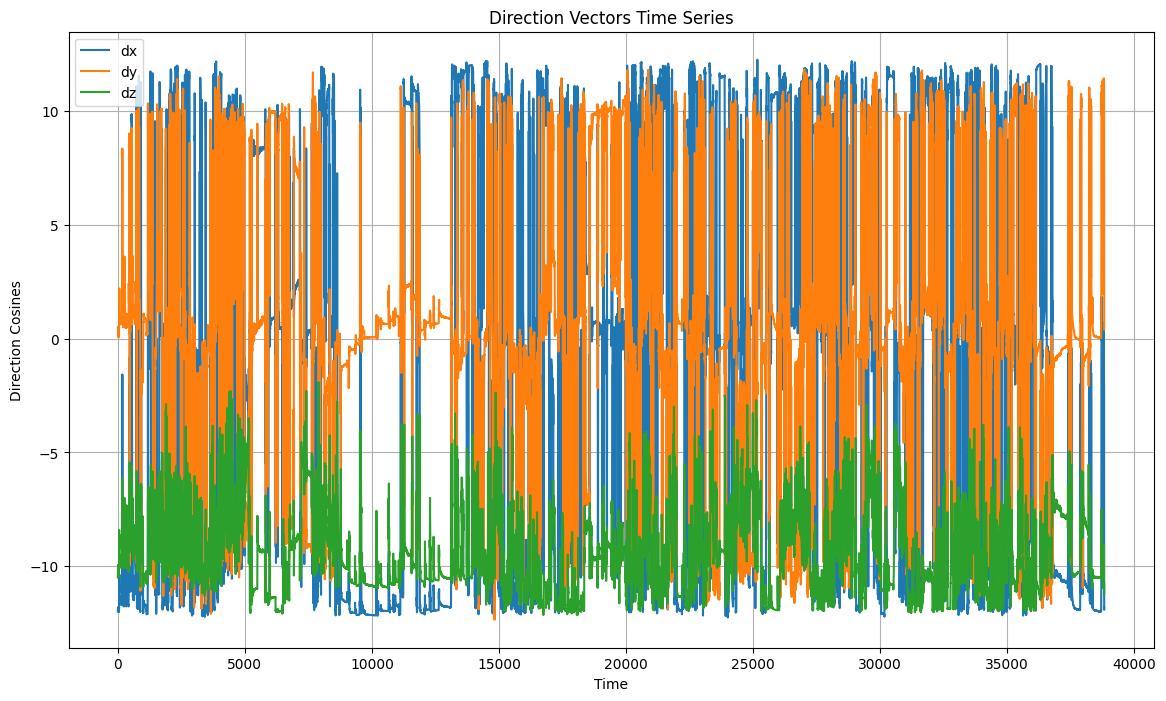

In [5]:
# Calculate direction vectors from quaternion
def quaternion_to_direction(quat):
    w, x, y, z = quat
    direction = np.array([
        2 * (x * z + w * y),
        2 * (y * z - w * x),
        1 - 2 * (x ** 2 + y ** 2)
    ])
    return direction

direction_vectors = np.apply_along_axis(quaternion_to_direction, 1, quaternions)

# Convert to DataFrame for better readability
df_direction_vectors = pd.DataFrame(direction_vectors, columns=['dx', 'dy', 'dz'])

# Plot direction vectors as time series
plt.figure(figsize=(14, 8))
plt.plot(df_direction_vectors['dx'], label='dx')
plt.plot(df_direction_vectors['dy'], label='dy')
plt.plot(df_direction_vectors['dz'], label='dz')
plt.title('Direction Vectors Time Series')
plt.xlabel('Time')
plt.ylabel('Direction Cosines')
plt.legend()
plt.grid(True)
plt.show()


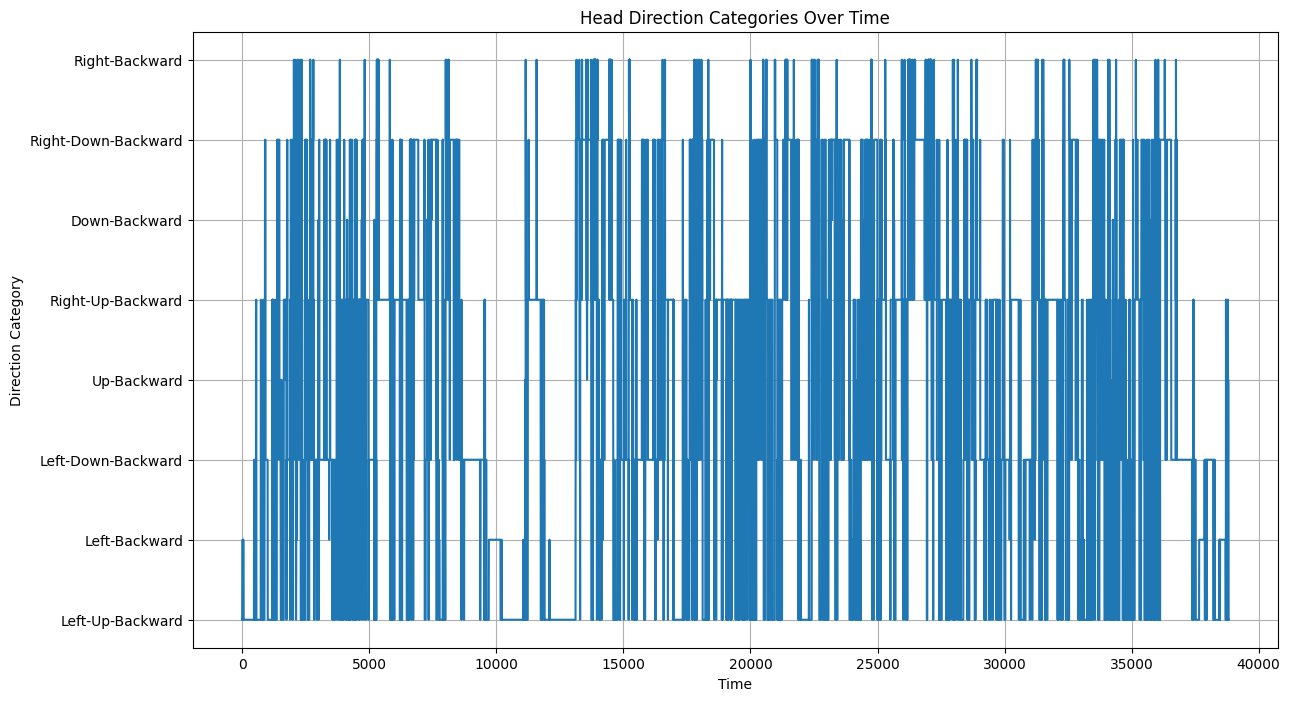

,dx,dy,dz,category
0,-11.973024,0.489817,-10.486707,Left-Up-Backward
1,-11.939849,0.513219,-10.373656,Left-Up-Backward
2,-11.870134,0.518601,-10.195943,Left-Up-Backward
3,-11.872648,0.494480,-10.192488,Left-Up-Backward
4,-11.881477,0.480075,-10.208270,Left-Up-Backward
5,-11.838878,0.451075,-10.095910,Left-Up-Backward
6,-11.816242,0.364864,-10.015385,Left-Up-Backward
7,-11.792928,0.255756,-9.936943,Left-Up-Backward
8,-11.795033,0.164489,-10.085577,Left-Up-Backward
9,-11.948384,0.241822,-10.334653,Left-Up-Backward


In [8]:
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

# Path to the file (update this path to your local file path)
file_path = 'H:/Miniscope_data/ACC_pain_kinematics/ID_1027/240524/quaternion_2024-05-24T10_18_28.raw'

# Define the quaternion structure (4 floats: w, x, y, z)
quaternion_size = 4  # number of elements in a quaternion

# Open the file and read the content
with open(file_path, 'rb') as file:
    raw_data = file.read()

# Calculate the number of floats in the raw data
total_floats = len(raw_data) // 4  # 4 bytes per float

# Unpack the binary data into an array of floats
raw_floats = struct.unpack(f'{total_floats}f', raw_data)

# Filter out zero values
filtered_floats = [value for value in raw_floats if value != 0.0]

# Reshape the filtered data into a 2D array where each row represents a quaternion (w, x, y, z)
num_quaternions = len(filtered_floats) // quaternion_size
filtered_floats = filtered_floats[:num_quaternions * quaternion_size]
quaternions = np.array(filtered_floats).reshape((num_quaternions, quaternion_size))

# Convert to DataFrame for better readability
df_quaternions_filtered = pd.DataFrame(quaternions, columns=['w', 'x', 'y', 'z'])

# Function to calculate direction vector from quaternion
def quaternion_to_direction(quat):
    w, x, y, z = quat
    direction = np.array([
        2 * (x * z + w * y),
        2 * (y * z - w * x),
        1 - 2 * (x ** 2 + y ** 2)
    ])
    return direction

# Calculate direction vectors from quaternion
direction_vectors = np.apply_along_axis(quaternion_to_direction, 1, quaternions)

# Convert to DataFrame for better readability
df_direction_vectors = pd.DataFrame(direction_vectors, columns=['dx', 'dy', 'dz'])

# Define a function to categorize directions
def categorize_direction(row, threshold=0.1):
    categories = []
    if row['dx'] > threshold:
        categories.append('Right')
    elif row['dx'] < -threshold:
        categories.append('Left')
    
    if row['dy'] > threshold:
        categories.append('Up')
    elif row['dy'] < -threshold:
        categories.append('Down')
    
    if row['dz'] > threshold:
        categories.append('Forward')
    elif row['dz'] < -threshold:
        categories.append('Backward')
    
    if not categories:
        return 'Stationary'
    
    return '-'.join(categories)

# Apply categorization to the direction vectors
df_direction_vectors['category'] = df_direction_vectors.apply(categorize_direction, axis=1)

# Plot categorized directions as a time series
plt.figure(figsize=(14, 8))
plt.plot(df_direction_vectors['category'])
plt.title('Head Direction Categories Over Time')
plt.xlabel('Time')
plt.ylabel('Direction Category')
plt.grid(True)
plt.show()

# Report the first few categorized directions
df_direction_vectors[['dx', 'dy', 'dz', 'category']].head(20)
